# Data Pre-processing

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [1]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns #built on top of matplotlib so need to load matplotlib

In [2]:
# Reading the dataset

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking the number of rows and columns

titanic.shape

(891, 12)

In [4]:
# Checking column names

titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Checking columns with missing values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handling missing values

In real world, the datasets are not clean and may have missing values. We must know how to find and deal with these missing values. 

One of the strategies to deal with missing values is to remove them from the dataset. 

However, whenever possible, we would like to impute the data, which is a process of filling the missing values. 

Let us take a look at the example on how to handle missing values. Only 3 columns out of 12 contain missing data. 

The Age column contains about 20% missing data, which can be dealt with using a technique called imputation, which means replacing the missing values with a known value, such as the mean, median or mode. Age is quantitative, so either mean or median imputation can be done. Embarked is a categorical variable, so mode imputation can be done.

As for the Cabin variable containing 77% missing data, we can simply delete the column. More sophisticated methods would be to see how Cabin numbers relate to the Survived or Pclass column and deal with it accordingly. For example, some of the cabins could be located near where the lifeboats are stored, so passengers residing in those cabins could have a higher chance of survival.

In [7]:
# Is dropping all the rows with missing values a good idea?
new_titanic = titanic.dropna()

In [8]:
# Checking if all the missing values are removed

print(new_titanic.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [9]:
# Checking the shape of the new dataset after dropping

print("No. of rows and columns:",new_titanic.shape) 


No. of rows and columns: (183, 12)


## Mode Imputation

In [10]:
# titanic.pivot_table('PassengerId', index = 'Survived', columns = 'Embarked', aggfunc='count')
mode_embarked = titanic['Embarked'].mode()[0] # Python still thinks the mode-aggregated object is a DataSeries (one column of a DataFrame), so we need to select the string inside the DataSeries, hence the [0].


In [11]:
titanic['Embarked'].fillna(mode_embarked,inplace = True) #to replace the existing dataset in fillna use attribute inplace = True

In [12]:
# Checking the shape of the new dataset after replacing missing values

print("No. of rows and columns:",titanic.shape)

No. of rows and columns: (891, 12)


In [13]:
# Checking if the missing values are removed from Embarked

print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Mean Imputation

In [14]:
# Checking the mean age of passengers groupby Survived or not

titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [15]:
titanic['Age'].mean() # Calculating the mean age for all the passengers for whom the age is present irrespective of whether survived or not

29.69911764705882

In [16]:
# Replacing missing values in the Age column by mean age of the passengers irrespective of survived or not

titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

In [17]:
# Checking the shape of the new dataset after replacing missing values

print("No. of rows and columns:",titanic.shape)

No. of rows and columns: (891, 12)


In [18]:
# Checking if the missing values are removed from Embarked

print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


## Indicator Variable

In [19]:
# Checking if there is a pattern between Cabin missing and Survived

titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean() # those who died had most missing value of cabin i.e., only 30% of those with missing Cabin value Survived 

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [20]:
titanic['Cabin'].isnull() # to see what innull() returns

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [21]:
titanic['Cabin'] # to see the values stored under the column Cabin


0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [22]:
# Creating a new indicator variable

titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(),'0','1')

In [23]:
# Check to see new column is added

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Cabin_ind        0
dtype: int64

## Deletion

The remaining column with missing data is Cabin (the cabin number). This column contains 77% missing data, so the easiest method would be to get rid of it entirely. Columns can be deleted using the .drop() method


In [24]:
titanic.drop(columns='Cabin', inplace=True)

In [25]:
# Check column Cabin is removed

titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_ind      0
dtype: int64

Additionally, the columns PassengerId, Name, Ticket are going to be irrelevant for further analysis, so we can drop those as well.

In [26]:
titanic.drop(columns=['PassengerId','Name','Ticket'], inplace=True)

In [27]:
# Check columns are removed

titanic.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Cabin_ind    0
dtype: int64

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    object 
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Cabin_ind  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


## Creating Dummy Variables

We now have 6 numerical columns and three categorical column (Sex, Embarked, Cabin_ind). 
Also, we need to realize that Pclass is an ordinal categorical variable, with 1st class having a higher status than 2nd class, and so on. These categorical varibales need to be changed into numerics because the machine learning algorithm can only understand numbers.

In the case of Pclass, the classes are already represented as numbers but in the reverse order. 3rd class is represented as 3 even though it signifies a lower status than 1st class, which is represented as 1. We could reverse the order and make 3rd class 1 and 1st class 3 but it would be misleading and confusing to interpret.

Representing ordinal categorical variables as integers depending on the order of importance assigned to them is known as label encoding. Label encoding can also be used for nominal variables which has no inherent order, for example, Red, Green, Blue being encoded as 1, 2, 3. The disadvantage is that the machine learning algorithm would misinterpret Blue to have a higher quantitative weight than Red even though they are supposed to be equally important.

Therefore, we use one-hot encoding for Pclass, Sex, Embarked and Cabin_ind. One-hot encoding separates categories into binary values of 0 and 1.


Consider the Sex column first. Initially, it contains the categories "Male" and "Female", specifying the sex of the passenger. We would like to encode these categories as numbers instead of letters so we apply the pandas method .get_dummies() onto the Sex column. After applying the .get_dummies() method, we see two new columns Sex_female and Sex_male, and the original Sex column has disappeared.

In the Sex_male column, if the passenger is male, then he is encoded as 1 and if not she is encoded as 0. The same thing is repeated for the Sex_female column. However, this repetition is undesirable to have because all the required information is already captured within one column. Either keep the Sex_male column and drop the Sex_female, or keep the Sex_female and drop the Sex_male.

In [29]:
titanic = pd.get_dummies(titanic, columns=['Sex'])

In [30]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_ind,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,0,1
1,1,1,38.0,1,0,71.2833,C,1,1,0
2,1,3,26.0,0,0,7.9250,S,0,1,0
3,1,1,35.0,1,0,53.1000,S,1,1,0
4,0,3,35.0,0,0,8.0500,S,0,0,1


In [31]:
# Drop Sex_female
titanic.drop('Sex_female', axis=1, inplace=True) # axis=1 specifies that a column is being dropped. If we want to drop rows, we specify axis=0


In [32]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Cabin_ind,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,0,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1


We perform the dummification process of getting dummy columns (the Sex_male and Sex_female are called dummy variables, which are obtained from the original Sex column) for the Pclass column. This time, we add an additional argument drop_first=True to the get_dummies() method to drop one irrelevant column:

In [33]:
titanic = pd.get_dummies(titanic, columns=['Pclass'], drop_first=True)

In [34]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Cabin_ind,Sex_male,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,S,0,1,0,1
1,1,38.0,1,0,71.2833,C,1,0,0,0
2,1,26.0,0,0,7.9250,S,0,0,0,1
3,1,35.0,1,0,53.1000,S,1,0,0,0
4,0,35.0,0,0,8.0500,S,0,1,0,1


In the Pclass column, we had 3 categories: first, second and third class passengers. One-hot encoding for 3 categories works like this: if the passenger is in 1st class, Pclass_1 = 1 and Pclass_2 = Pclass_3 = 0. If the passenger is in 2nd class, Pclass_2 = 1 and Pclass_1 = Pclass_3 = 0, and similarly for 3rd class passengers.

In this case, all the information is captured in two columns (the irrelevant column was already dropped by specifying the drop_first=True argument in the previous line of code). Likewise, if we have 4 categories in a column, we create 3 dummies and drop one, and so on.


In [35]:
#Create dummies for the other two qualitative variables
titanic = pd.get_dummies(titanic, columns = ['Embarked','Cabin_ind'],drop_first=True)

In [36]:
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Cabin_ind_1
0,0,22.0,1,0,7.2500,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,1
2,1,26.0,0,0,7.9250,0,0,1,0,1,0
3,1,35.0,1,0,53.1000,0,0,0,0,1,1
4,0,35.0,0,0,8.0500,1,0,1,0,1,0


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
 5   Sex_male     891 non-null    uint8  
 6   Pclass_2     891 non-null    uint8  
 7   Pclass_3     891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Cabin_ind_1  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(6)
memory usage: 40.2 KB


## Feature Engineering

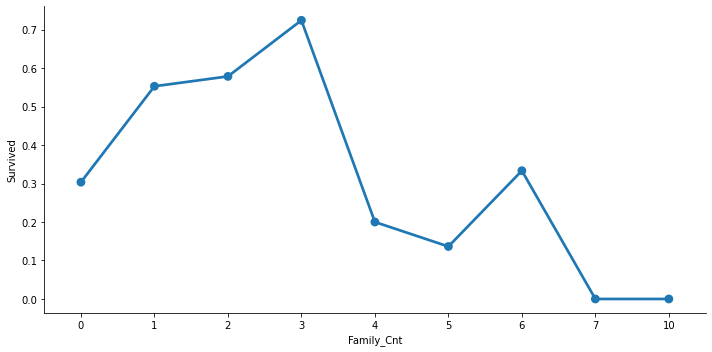

In [38]:
titanic['Family_Cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(data = titanic,
            x = 'Family_Cnt',
            y= 'Survived',
            kind = 'point',
            aspect = 2,
            ci = None)

In [39]:
# Can drop SibSp and Parch from dataset since we wont use them for further analysis

titanic.drop(columns=['SibSp','Parch'], inplace=True)

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   Sex_male     891 non-null    uint8  
 4   Pclass_2     891 non-null    uint8  
 5   Pclass_3     891 non-null    uint8  
 6   Embarked_Q   891 non-null    uint8  
 7   Embarked_S   891 non-null    uint8  
 8   Cabin_ind_1  891 non-null    uint8  
 9   Family_Cnt   891 non-null    int64  
dtypes: float64(2), int64(2), uint8(6)
memory usage: 33.2 KB


## Handling Outlier

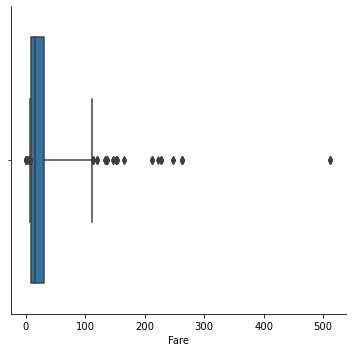

In [41]:
sns.catplot(data = titanic,
            x = 'Fare',
            kind = 'box',
           whis = [5,95])

In [42]:
#Winsorise
from scipy.stats.mstats import winsorize

In [43]:
# Trimming from top and bottom

titanic['New_fare'] = winsorize(titanic['Fare'], limits=[0.05, 0.05]) # how much to winsorize from top and bottom 5-95%

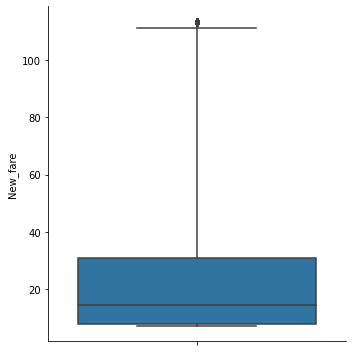

In [44]:
sns.catplot(data = titanic,
            y = 'New_fare',
            kind = 'box',
           whis = [5,95]) 

In [45]:
# Saving the pre-processed dataset in local drive

titanic.to_csv('titanic_cleaned_1807.csv', encoding = 'utf-8-sig') 
# files.download('titanic_cleaned_1807.csv')